# Earthquakes
### Regression Renegades
##### Emmanuel, Vincent G., Sirri, Alicia A., James

#### Abstract
In this study utilizing data from the United States Geological Survey, we explored the relationship between earthquake magnitude and depth over a two-month period. Our initial hypothesis suggest that an increase in depth would correspond to a higher earthquake magnitude. However, comprehensive analyses, including descriptive statistics, histogram evaluations, and linear regression, unveiled unexpected outcomes. Despite a substantial occurrence of 453 earthquakes, with 90 registering as unnoticable (magnitude ≤ 2.5), the data did not support our hypothesis. The correlation coefficient of 0.067 indicated a weak positive correlation between depth and magnitude, challenging the anticipated strong connection. Visualizations demonstrated a scattered pattern, emphasizing the complexity of seismic dynamics. The exclusion of outliers clarified the relationship but did not align with our initial assumptions. In conclusion, our findings suggest that, within the examined dataset, depth does not significantly influence earthquake magnitude, prompting further exploration into the factors governing seismic activity.

#### Background

Eathquakes occur when two blocks of earth slip past each other, and the surface in which they slip past each other is called a fault. The Earth's mantle consists of techtonic plates that are always slowly moving. Due to friction, the plates get stuck at the edges. Once the friction is overcome, an earthquake occurs which releases wave energy through the earth's crust  This earthquake data source provides various information including depth, magnitude, and magnitude type. For our presentation, we chose to to analyze various U.S. earthquakes during the year 2023 to test if an increase in depth will result in an increase in the magnitude of the earthquake.

Citation:What is an earthquake and what causes them to happen? | U.S. Geological Survey. (n.d.). https://www.usgs.gov/faqs/what-earthquake-and-what-causes-them-happen#:~:text=The%20tectonic%20plates%20are%20always,the%20shaking%20that%20we%20feel. 

![Earthquake](p_earthquake_471231135.png)

In [1]:
# Import Numpy and Datascience modules.
import numpy as np
import pandas as pd
from datascience import *

# Plotting modules
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

import folium
from folium.plugins import MarkerCluster

#### Earthquakes in the US 09/01/2023 until 11/12/2023
Our data is sourced from the United States Geological Survey(USGS), specifically their earthquake database. https://earthquake.usgs.gov/earthquakes/map The motivation behind studying this dataset is to explore the potential relationship between earthquake magnitude and depth. Earthquakes are a natural phenomena with varying magnitudes and depths, understanding their interplay can contribute to sesimic risk assessments and prepardeness.

#### Research Question
What is the relationship between earthquake magnitude and depth, and does an increase in depth correlate with an increase in magnitude?

#### Descriptive Statsitics:
We begin by exploring the dataset using descriptive statstics to understand the range and distribution of earthquake magnitudes. This will help us identify extreme values and get a general sense of the data.

In [2]:
url = 'data/USearthquake_fall_2023.csv'
eq = Table.read_table(url)
eq

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2023-09-01T01:35:48.710Z,37.4162,-121.789,3.16,2.64,md,95,30,0.03537,0.08,nc,nc73931501,2023-11-04T21:36:07.040Z,"6 km NNE of Alum Rock, CA",earthquake,0.1,0.29,0.113,79,reviewed,nc,nc
2023-09-01T03:22:51.760Z,33.1607,-115.936,7.47,2.59,ml,77,40,0.03741,0.18,ci,ci39656434,2023-11-04T21:36:08.040Z,"16 km S of Salton City, CA",earthquake,0.16,0.44,0.141,25,reviewed,ci,ci
2023-09-01T04:07:53.110Z,32.3862,-115.143,11,2.54,ml,26,68,0.068,0.29,ci,ci39656442,2023-11-04T21:36:08.040Z,"6 km NE of Delta, B.C., MX",earthquake,0.45,0.82,0.083,25,reviewed,ci,ci
2023-09-01T09:13:18.922Z,31.9327,-102.021,8.38798,2.8,ml,20,58,0.1,0.1,tx,tx2023rcrm,2023-11-04T21:36:09.040Z,"8 km SE of Midland, Texas",earthquake,0.617332,1.41361,0.2,30,reviewed,tx,tx
2023-09-01T09:27:48.139Z,38.6879,-97.5303,8.254,2.6,ml,23,118,0.726,0.37,us,us7000kskr,2023-11-04T21:36:09.040Z,"6 km E of Assaria, Kansas",earthquake,1.69,6.909,0.055,43,reviewed,us,us
2023-09-01T12:11:43.657Z,28.9517,-97.632,2.07865,2.9,ml,20,90,0.0981515,0.3,tx,tx2023rcxj,2023-11-04T21:36:12.040Z,"4 km NNW of Nordheim, Texas",earthquake,1.26861,1.65403,0.2,13,reviewed,tx,tx
2023-09-01T20:43:01.300Z,36.2677,-97.2688,5.56,2.65,ml,98,27,0,0.21,ok,ok2023rdog,2023-11-04T21:36:15.040Z,"2 km SE of Perry, Oklahoma",earthquake,nan,0.3,0.23,37,reviewed,ok,ok
2023-09-01T23:30:16.020Z,40.6023,-121.829,14.04,3.06,ml,45,36,0.09811,0.13,nc,nc73931886,2023-11-04T21:36:15.040Z,"13 km NNE of Shingletown, CA",earthquake,0.18,0.52,0.152,36,reviewed,nc,nc
2023-09-01T23:56:51.230Z,38.8053,-122.811,3.61,2.8,md,86,26,0.01254,0.06,nc,nc73931896,2023-11-04T21:36:15.040Z,"6 km WNW of The Geysers, CA",earthquake,0.09,0.13,0.217,111,reviewed,nc,nc
2023-09-02T04:28:28.649Z,31.586,-104.499,6.05444,3.4,ml,35,142,0.0827069,0.3,tx,tx2023redp,2023-11-04T21:36:16.040Z,"66 km S of Whites City, New Mexico",earthquake,1.48787,1.33789,0.2,24,reviewed,tx,tx


In [3]:
eq.num_rows

453

#### In about two months, there were 453 recorded earthquakes in the United States! Most earthquakes are recorded but not felt, let's see a histogram of how many earthquakes that were not felt.

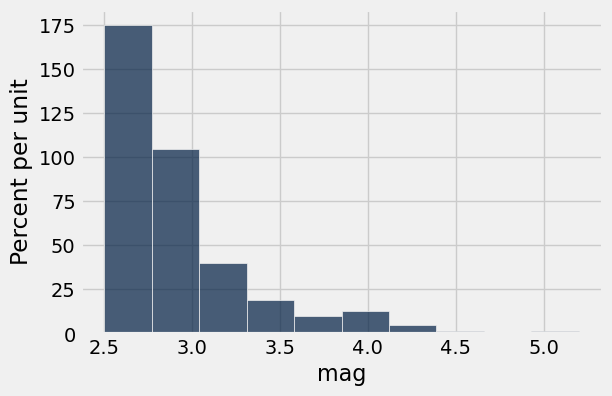

In [4]:
eq.hist('mag')

In [5]:
min_duration = min(eq.column('mag'))
max_duration = max(eq.column('mag'))
print(f" The hardest earthquake was a magnitude of {max_duration}!")
print(f" The softest earthquake was a magnitude of {min_duration}!")

 The hardest earthquake was a magnitude of 5.2!
 The softest earthquake was a magnitude of 2.5!


In [6]:
eq = pd.read_csv('data/USearthquake_fall_2023.csv')

# Create a map object with an initial location and zoom level
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map)

# Iterate through the DataFrame and add markers
for index, row in eq.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    magnitude = row['mag']
    depth = row['depth']
    
    popup_text = f"Magnitude: {magnitude}, Depth: {depth}"
    marker = folium.Marker(location=[latitude, longitude], popup=popup_text)
    marker.add_to(marker_cluster)

map

#### According to Michigan Technological University, an earthquake of 2.5 magnitude or less is not felt.

Citation:

Michigan Technological University. (2021, October 4). Earthquake magnitude scale. https://www.mtu.edu/geo/community/seismology/learn/earthquake-measure/magnitude/ 

In [7]:
# Filter for minor earthquakes (magnitude below 2.6)
minor_eq = eq[eq['mag'] < 2.6]

minor_eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1,2023-09-01T03:22:51.760Z,33.160667,-115.935833,7.470000,2.59,ml,77,40.0,0.037410,0.18,...,2023-11-04T21:36:08.040Z,"16 km S of Salton City, CA",earthquake,0.160000,0.440000,0.141,25.0,reviewed,ci,ci
2,2023-09-01T04:07:53.110Z,32.386167,-115.142667,11.000000,2.54,ml,26,68.0,0.068000,0.29,...,2023-11-04T21:36:08.040Z,"6 km NE of Delta, B.C., MX",earthquake,0.450000,0.820000,0.083,25.0,reviewed,ci,ci
15,2023-09-03T06:12:48.216Z,40.204000,-98.314800,9.331000,2.50,mb_lg,10,66.0,1.210000,0.31,...,2023-09-23T09:36:04.040Z,"10 km SSW of Lawrence, Nebraska",earthquake,3.550000,6.705000,0.089,33.0,reviewed,us,us
26,2023-09-04T23:20:05.039Z,31.667995,-104.446789,5.874487,2.50,ml,31,63.0,0.017261,0.20,...,2023-10-03T05:09:55.040Z,NaN,earthquake,0.936570,0.502155,0.100,19.0,reviewed,tx,tx
27,2023-09-05T10:21:41.860Z,40.124000,-123.059333,42.780000,2.50,md,53,27.0,0.092940,0.15,...,2023-09-06T09:00:39.040Z,"40 km NNE of Covelo, CA",earthquake,0.340000,0.560000,0.230,55.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2023-11-08T23:42:25.075Z,31.617000,-104.096000,6.093000,2.50,ml(texnet),30,52.0,0.000000,0.20,...,2023-11-11T13:22:17.630Z,"44 km NW of Toyah, Texas",earthquake,0.405905,0.355231,0.100,15.0,reviewed,tx,tx
428,2023-11-09T08:56:50.892Z,31.621000,-104.497000,7.314100,2.50,ml(texnet),30,75.0,0.000000,0.20,...,2023-11-09T12:53:53.082Z,"62 km S of Whites City, New Mexico",earthquake,0.991719,0.734303,0.100,24.0,reviewed,tx,tx
429,2023-11-09T10:25:02.270Z,38.299667,-119.310000,5.570000,2.59,ml,47,115.0,0.227800,0.15,...,2023-11-09T20:22:12.332Z,"8 km NW of Bridgeport, CA",earthquake,0.250000,3.440000,0.237,19.0,reviewed,nc,nc
439,2023-11-10T15:43:17.338Z,31.639000,-104.012000,5.758800,2.50,ml(texnet),21,57.0,0.000000,0.10,...,2023-11-10T15:51:35.699Z,"39 km W of Mentone, Texas",earthquake,0.285068,0.381169,0.200,11.0,reviewed,tx,tx


In [8]:
print(minor_eq.shape[0])

90


#### So there were 90 earthquakes that were not felt in the US!

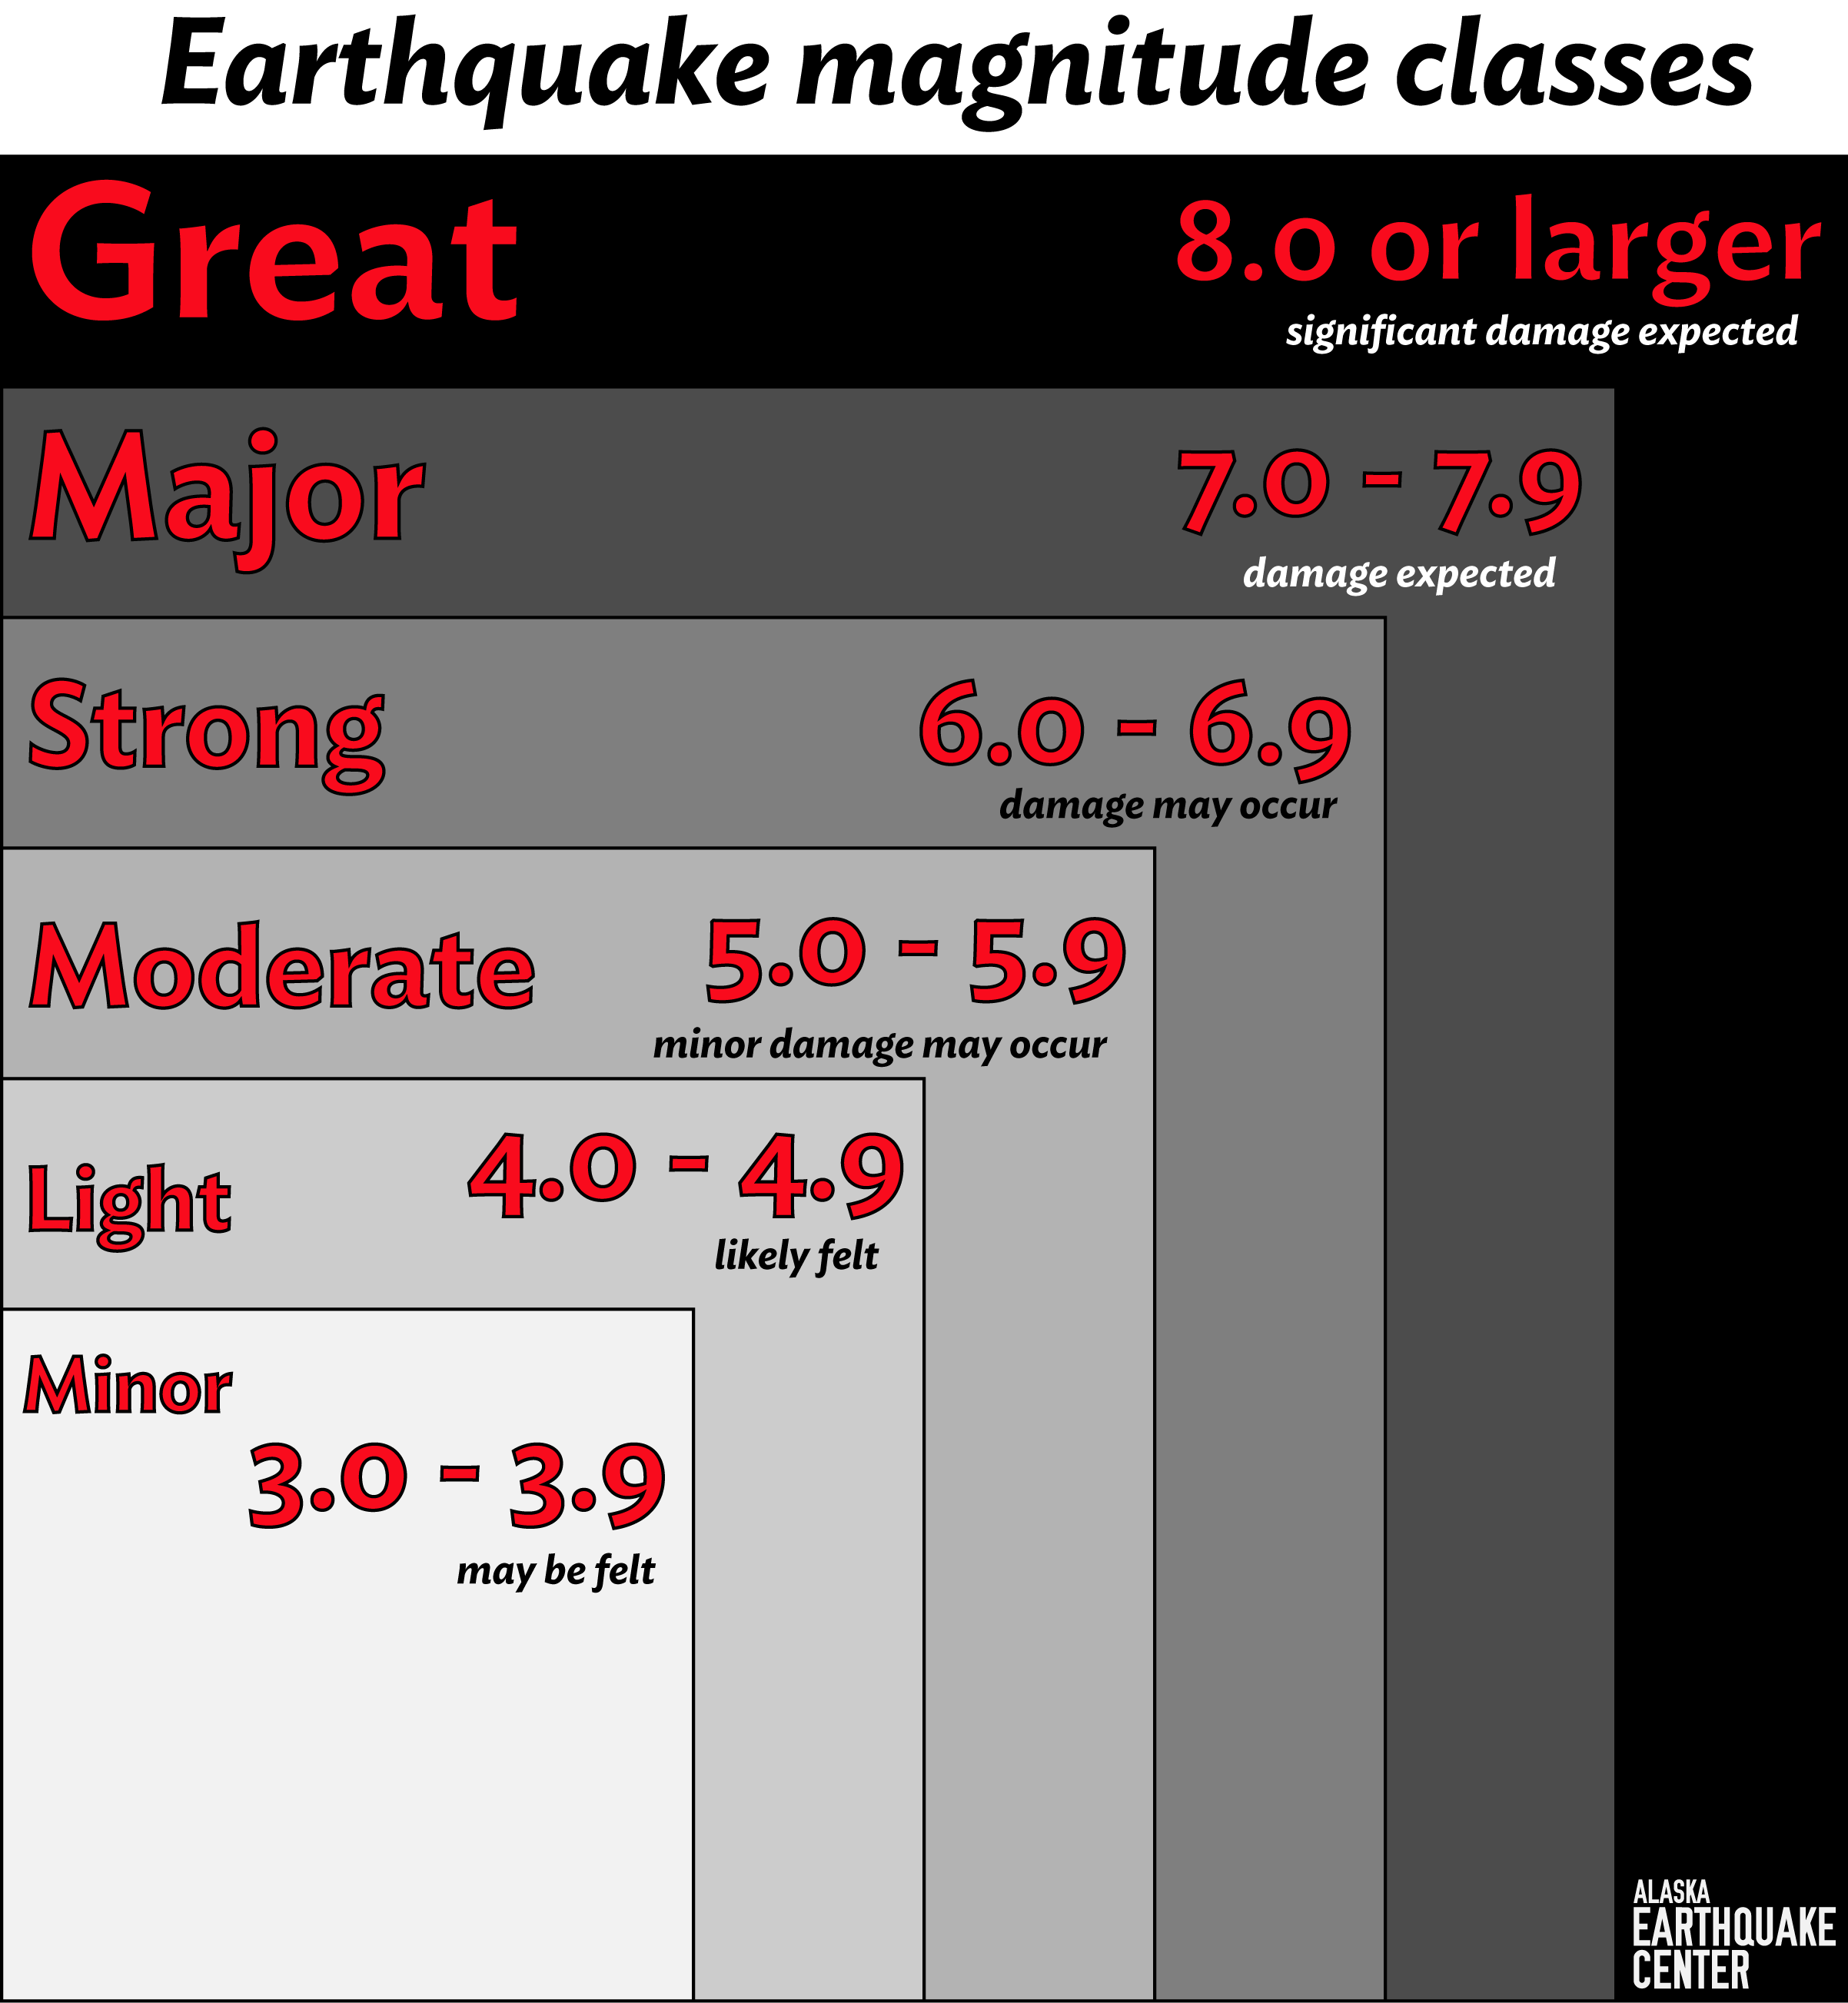!

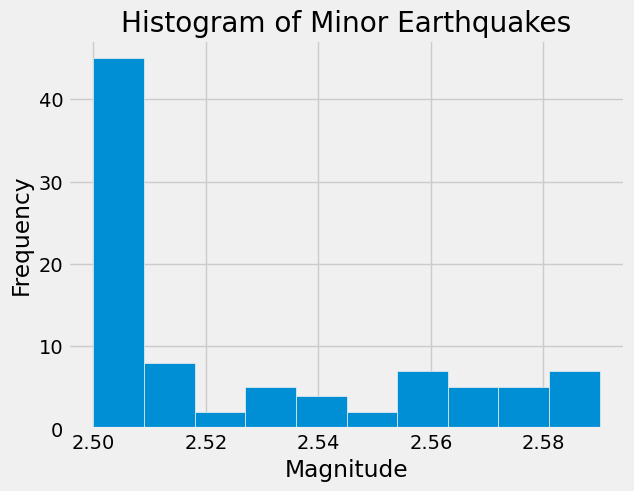

In [9]:
minor_eq = eq[eq['mag'] < 2.6]

# Plotting the histogram
minor_eq['mag'].hist(bins=10)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Minor Earthquakes')
plt.show()

#### So there were 90 earthquakes that were not felt in the US! Let's take a look at where in the US did these earthquakes took place in:

### Now let's take a look at where these earthquakes that are less than 2.6 occur:

In [10]:
# Load the data into a pandas DataFrame
eq = pd.read_csv('data/USearthquake_fall_2023.csv')

# Filter the DataFrame for earthquake magnitudes less than 2.6
minor_eq = eq[eq['mag'] < 2.6]

# Create a map object with an initial location and zoom level
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map)

# Iterate through the filtered DataFrame and add markers for minor earthquakes
for index, row in minor_eq.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    magnitude = row['mag']
    depth = row['depth']
    
    popup_text = f"Magnitude: {magnitude}, Depth: {depth}"
    marker = folium.Marker(location=[latitude, longitude], popup=popup_text)
    marker.add_to(marker_cluster)

# Display the map in JupyterLab
map

### Let's take a look at how often these earthquake happen, ranging from minor to light to moderate, according to Alaska Earthquake Center:

In [11]:
# Create subsets of earthquakes based on their magnitudes
minor_eq = eq[eq['mag'] < 4]  # Updated to minor_eq for magnitude less than 4
light_eq = eq[(eq['mag'] >= 4) & (eq['mag'] < 5)]  # Earthquakes with magnitude 4 to less than 5
moderate_eq = eq[eq['mag'] >= 5]  # Earthquakes with magnitude 5 or higher

# Count the number of earthquakes in each subset
minor_eq_count = minor_eq.shape[0]
light_eq_count = light_eq.shape[0]
moderate_eq_count = moderate_eq.shape[0]

# Calculate the total number of earthquakes
total_eq_count = eq.shape[0]

# Calculate the percentage of each subset
minor_eq_percentage = (minor_eq_count / total_eq_count) * 100
light_eq_percentage = (light_eq_count / total_eq_count) * 100
moderate_eq_percentage = (moderate_eq_count / total_eq_count) * 100

# Display the results
print(f"Percentage of earthquakes with magnitude less than 4: {minor_eq_percentage:.2f}%")
print(f"Percentage of earthquakes with magnitude greater than or equal to 4 but less than 5: {light_eq_percentage:.2f}%")
print(f"Percentage of earthquakes with magnitude 5 or higher: {moderate_eq_percentage:.2f}%")

Percentage of earthquakes with magnitude less than 4: 95.36%
Percentage of earthquakes with magnitude greater than or equal to 4 but less than 5: 4.42%
Percentage of earthquakes with magnitude 5 or higher: 0.22%


# Hypothesis

We hypothesize that an INCREASE in depth will INCREASE the magnitude of an earthquake.

null hypothesis: There is no correlation between depth and magnitude, it is random.

Just from our data exploration, we haven't seen a specific relationship off the jump, but we think that this relationship is interesting to us, so we want to get to the bottom of it.

# Data Science Plan!
We will use a linear regression model to test our hypothesis, using some helpful functions that we used in lab 8, with the old faithful data.

In [12]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  


def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))


# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))


def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [13]:
url = 'data/USearthquake_fall_2023.csv'
eq = Table.read_table(url)

In [14]:
# Creating a table with our columns of interest, magnitude and depth
md_eq = Table().with_columns("magnitude", eq.column("mag"), "depth" , eq.column("depth"))
md_eq

magnitude,depth
2.64,3.16
2.59,7.47
2.54,11
2.8,8.38798
2.6,8.254
2.9,2.07865
2.65,5.56
3.06,14.04
2.8,3.61
3.4,6.05444


Just from looking at this table, I don't see a relationship right away.

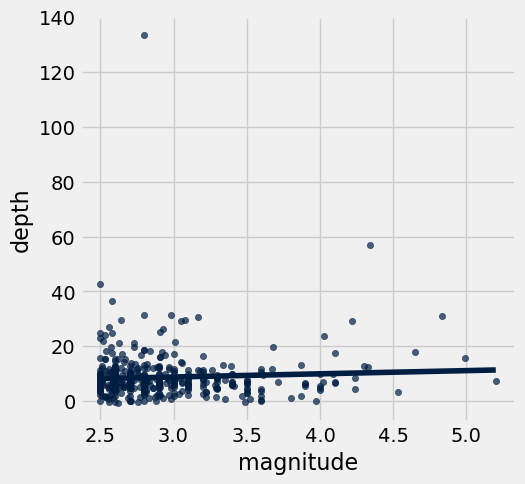

In [15]:
md_eq.scatter(0, 1, fit_line = True)

I don't like this outlier with a depth of 130. Sure it may be important, but it may be messing with our graph. Lets get rid of it.

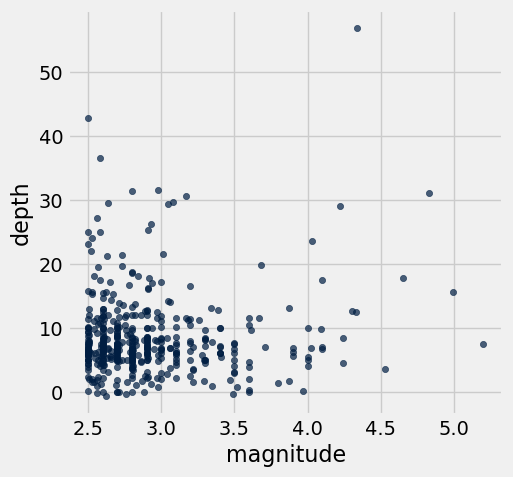

In [16]:
md_eq.where("depth",are.below(100)).scatter("magnitude","depth")

This looks better. Our scatter plot is more consise, where we can almost every data point. However, lets convert to standard units

In [17]:
magnitude_mean = np.mean(md_eq.column("magnitude"))
magnitude_std = np.std(md_eq.column("magnitude"))
depth_mean = np.mean(md_eq.column("depth"))
depth_std = np.std(md_eq.column("depth"))

md_standard = Table().with_columns(
    "magnitude (standard units)", ((md_eq.column("magnitude") - magnitude_mean)/ magnitude_std),
    "depth (standard units)", ((md_eq.column("depth") - depth_mean)/ depth_std))
md_standard

magnitude (standard units),depth (standard units)
-0.603571,-0.643376
-0.716986,-0.144811
-0.8304,0.263527
-0.240645,-0.0386224
-0.694303,-0.0541207
-0.0138166,-0.768462
-0.580888,-0.365753
0.349109,0.615183
-0.240645,-0.591322
1.12033,-0.308557


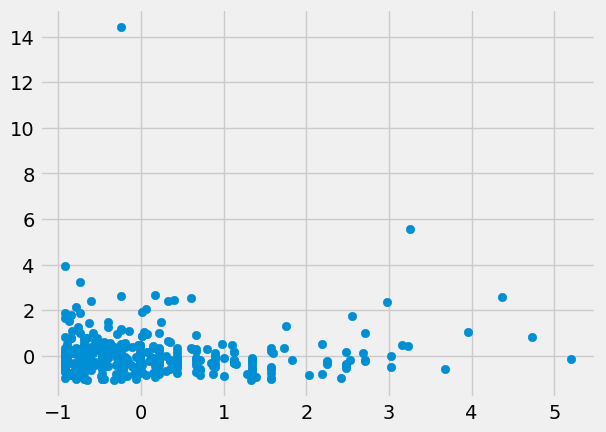

In [18]:
# Plotting in su
plt.scatter(md_standard.column("magnitude (standard units)"), md_standard.column("depth (standard units)"))
plt.show()

Lets remove this outlier! One crazy outlier can completely destroy our regression line, and without it we can see each plot point more clearly.

In [19]:
md_standard_filtered = md_standard.where("depth (standard units)",are.below(8))
md_standard_filtered

magnitude (standard units),depth (standard units)
-0.603571,-0.643376
-0.716986,-0.144811
-0.8304,0.263527
-0.240645,-0.0386224
-0.694303,-0.0541207
-0.0138166,-0.768462
-0.580888,-0.365753
0.349109,0.615183
-0.240645,-0.591322
1.12033,-0.308557


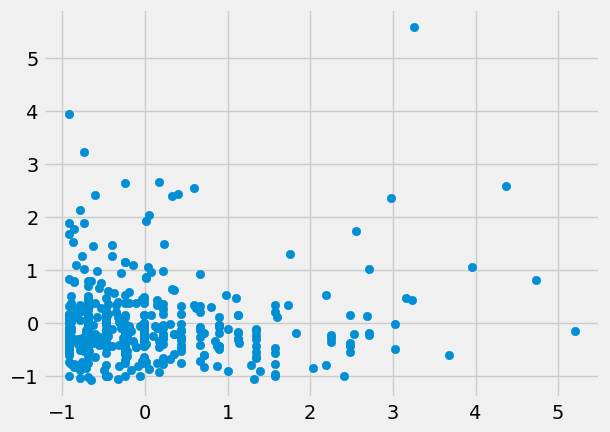

In [20]:
plt.scatter(md_standard_filtered.column("magnitude (standard units)"), md_standard_filtered.column("depth (standard units)"))
plt.show()

Quickly looking at the visuals, there is not a great positive correlation like we expected. We have a huge group at the low depth and magnitude areas, and we have a few straglers.

# Lets compute the correlation

In [21]:
t_product = md_standard_filtered.with_column("product of su", md_standard_filtered.column(0) * md_standard_filtered.column(1))
t_product

magnitude (standard units),depth (standard units),product of su
-0.603571,-0.643376,0.388323
-0.716986,-0.144811,0.103827
-0.8304,0.263527,-0.218832
-0.240645,-0.0386224,0.00929429
-0.694303,-0.0541207,0.0375761
-0.0138166,-0.768462,0.0106176
-0.580888,-0.365753,0.212462
0.349109,0.615183,0.214766
-0.240645,-0.591322,0.142299
1.12033,-0.308557,-0.345685


In [22]:
r = np.mean(t_product.column("product of su"))
r

0.067206749659372789

Wow. This correlation is nothing like we expected. This means that magnitude does not increase in depth.

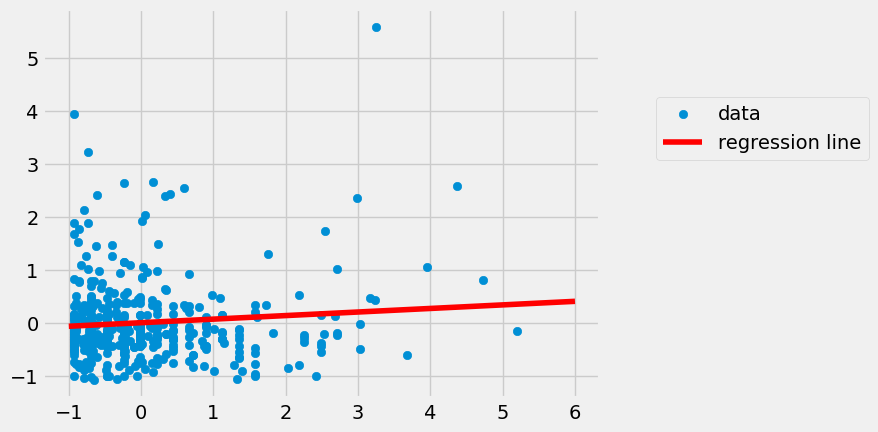

In [23]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line",color="red")
    plt.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(md_standard_filtered, 
                   "magnitude (standard units)", 
                   "depth (standard units)", 
                   [-1, -1*r], 
                   [6, 6*r])

## Conclusion

We used various methods throughout our project to explore the correlation between depth and magnitude. We hypothesized that as depth increased so would the magnitude. Following our analysis of 453 earthquakes, we found that there was virtually no correlation between the depths and magnitudes of earthquakes. From the table of magnitude vs. depth there did not appear to be a clear trend in the data. Next, we plotted the points on a scatter plot in which we observered a very weak positive correlation. Finally,the r value of the plot was achieved from the statistical test which was 0.06. This value further demonstrated that there is negligible correlation between the depth and magnitude of an earthquake.